In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Load the data
df = pd.read_csv("/content/merged_news_dataset.csv")

# Step 2: Drop missing/null values
df.dropna(subset=['text', 'label'], inplace=True)

# Step 3: Split data into features and target
X = df['text']
y = df['label']

# Step 4: Vectorize the text using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_vectorized = tfidf.fit_transform(X)

# Step 5: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# ----------------------
# Logistic Regression
# ----------------------
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("===== Logistic Regression Results =====")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))

# ----------------------
# Random Forest Classifier
# ----------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("\n===== Random Forest Results =====")
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))


===== Logistic Regression Results =====
Accuracy: 0.9854120267260579
Confusion Matrix:
 [[4574   76]
 [  55 4275]]
Classification Report:
               precision    recall  f1-score   support

        fake       0.99      0.98      0.99      4650
        real       0.98      0.99      0.98      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


===== Random Forest Results =====
Accuracy: 0.9912026726057906
Confusion Matrix:
 [[4616   34]
 [  45 4285]]
Classification Report:
               precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4650
        real       0.99      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



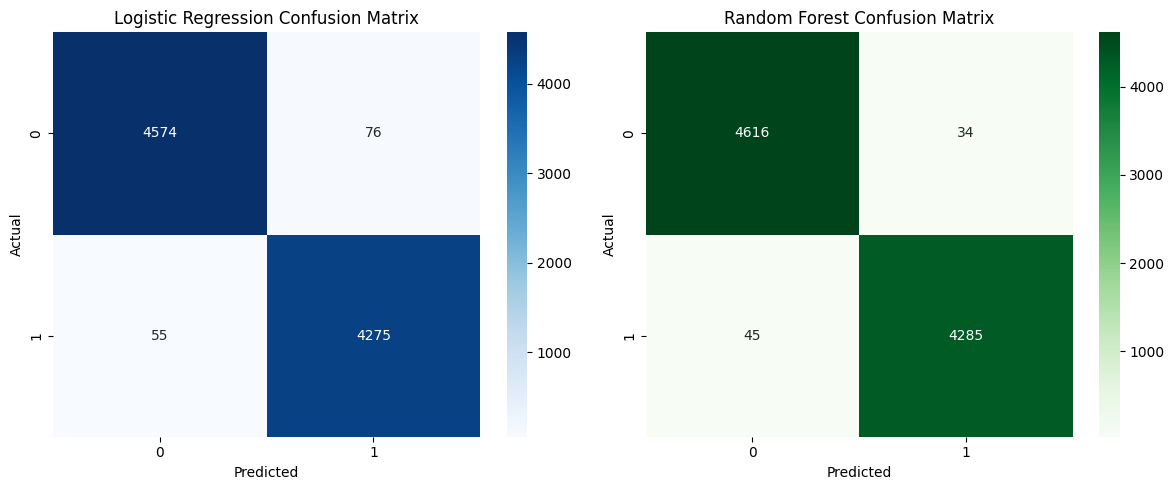

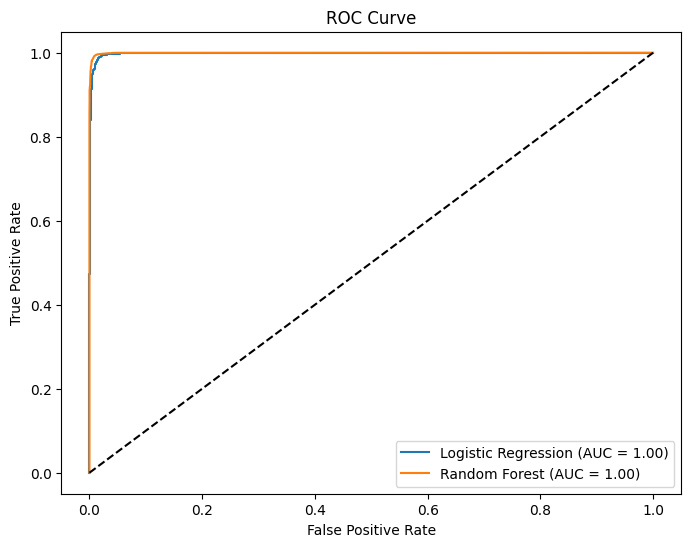

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Confusion Matrices
cm_lr = confusion_matrix(y_test, lr_preds)
cm_rf = confusion_matrix(y_test, rf_preds)

# Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title('Logistic Regression Confusion Matrix')
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title('Random Forest Confusion Matrix')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ROC Curve
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

lr_probs = lr_model.predict_proba(X_test)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test_bin, lr_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, rf_probs)

roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

/tmp/ipython-input-5-4256457946.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_20, palette='viridis')


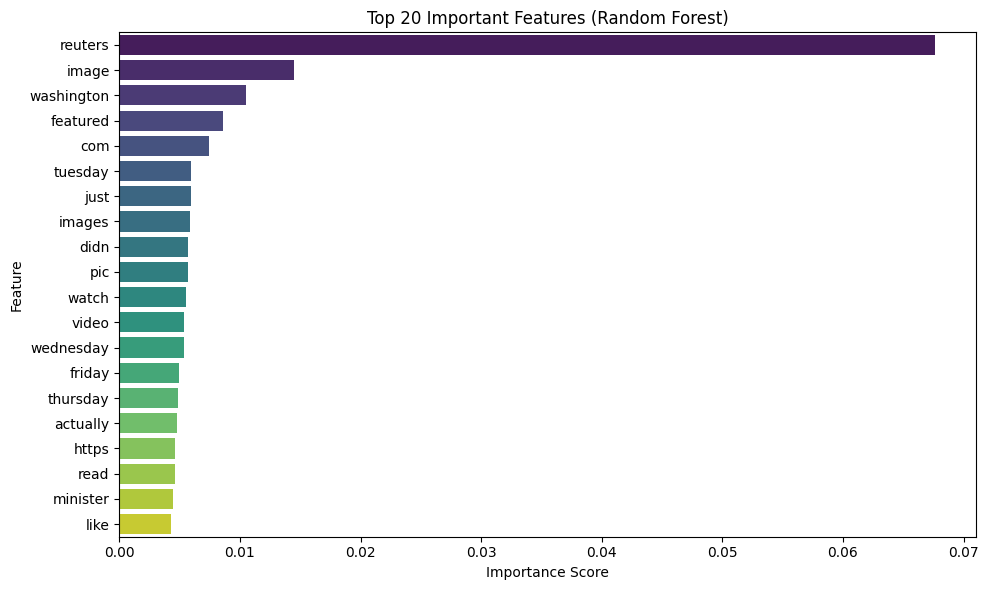

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances and feature names
importances = rf_model.feature_importances_
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort and select top 20 features
top_20 = importance_df.sort_values(by='importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_20, palette='viridis')
plt.title('Top 20 Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

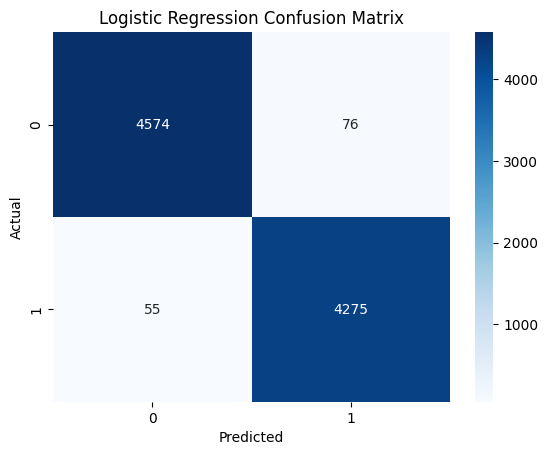

<Figure size 640x480 with 0 Axes>

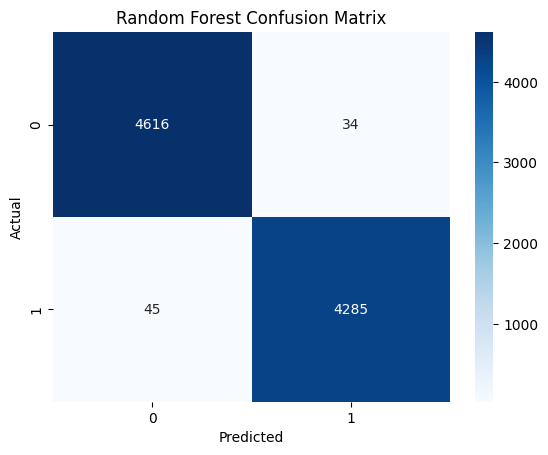

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    return fig

# Generate predictions
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Plot confusion matrices
plt.figure() # Create a new figure for the first plot
plot_confusion_matrix(y_test, lr_preds, "Logistic Regression Confusion Matrix")
plt.show()

plt.figure() # Create a new figure for the second plot
plot_confusion_matrix(y_test, rf_preds, "Random Forest Confusion Matrix")
plt.show()